# Heat

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   23nd of February 2024

## Exercise 8: Plume rise and heat bugdet

The heat flow ($q$) measured out of the Hawaiian plume is 0.4 TW. From tomographic images, you resolve the hot material to be flowing up a vertical pipe of radius $R = 50~km$. You also make out that the temperature difference between the hot material and the surrounding mantle is $\Delta T = 100~^{\circ}C$.

The volume that flows past a point on a pipe within unit-time is $V = \pi R^2 v$, where $v$ is the velocity of the flow. The amount of extra heat that has been carried past this points within unit-time is:

$$ q = V \rho_P C_p \Delta T $$

where $\rho_P = 3300~kg/m^3$ is the density of the plume material, $C_p = 1000~J kg^{-1}C^{-1}$ is the specific heat capacity of the plume, and $\Delta T$ is the temperature difference between the hot material and the surrounding mantle. 

In all honesty, using a perfectly cylindrical pipe is unrealistic - plus tomographic methods generally lack the resolution to resolve such thin features. Researchers have long developed alternative methods to estimate the heat flow out of plumes, in hopes to fully account for the Earth's heat budget. Namely, for the case of an upwelling plume, heat flow can be related to buoyancy flux ($Q_B$) by assuming that the excess buoyancy is generated by thermal expansion. Thus:

$$Q_H = \frac{C_P}{\alpha} \cdot Q_B$$

where $\alpha = 3 \cdot 10^-5~C^-1$ is thermal expansivity, and $Q_B$ is buoyancy flux expressed in units of Mg/s (1 Mg = 10^6 kg). 

Sleep (1990) described a method for constraining buoyancy flux for plumes located away from plate margins by measuring the rate at which new swell topography is generated and assuming that it is supported by thermal isostasy. If excess buoyancy is generated within the lithosphere, it moves downstream at the velocity of the overriding plate. The buoyancy flux can then be calculated by combining plate velocity with the cross-sectional area of the swell above the conduit, measured perpendicular to the direction of plate motion. Thus:

$$Q_B = (\rho_M - \rho_W) \cdot A \cdot v_p$$

where $\rho_M = 3300 kg~m^{-3}$ is the density of the mantle, $\rho_W = 1000 kg~m^{-3}$ is the density of the water, $A$ is the cross-sectional area perpendicular to plate motion and $v_p$ is the plate velocity.


Estimates from magmatic hotspots yield a cumulative lower bound on global plume flux of $2~TW$, if all buoyancy is assumed to be thermal in origin. In the text file `BUOYANCY_FLUX_HOGGARD2020.txt` you will find the buoyancy flux for many plumes, in units of Mg/s (1 Mg = 10^6 kg). The data is tacken from Hoggard et al., 2020 (https://doi.org/10.1016/j.epsl.2020.116317).

Perform the following exercises:

1. Obtain an expression of the velocity of flow up the simplified cylindrical plume-conduit. Based on the know parameters, what is the velocity of the flow?

2. Calculate the heat flux (heat flow per unit area) out of the plume. How does this compare to the average heat flux (units of W/m^2) of the Earth's oceanic and continental crust? 

3. Based on the method described by Sleep (1990), calculate the buoyancy flux for the Hawaiian plume. 



In [1]:
# Hawaii in Sleep(1990) method

#QB_kg_yr = (3300 -1000) * 1430e6 * 83e-3
QB_kg_yr = (3300 -1000) * 1094e6 * 83e-3
QB_Mg_s = QB_kg_yr * 1e-3 / (365 * 24 * 3600)
QB_Mg_s

6.622418822932522

In [1]:
# Public dependencies
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Online dependencies - GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_SCRIPTS = '/content/gdrive/MyDrive/2024-Geodynamics/01_PLATE_MOTIONS/SCRIPTS'


# Local dependencies - YOUR COMPUTER
path_to_SCRIPTS = os.getcwd() 


path_to_data = os.path.join(path_to_SCRIPTS, "DATA")
path_to_modules = os.path.join(path_to_SCRIPTS, "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)


from map_dependencies import geodesic_distance, add_residual_bathymetry_hawaii

In [4]:
# Replace the parameters with your coordinates!
distance = geodesic_distance(-157.5, 16.3, 
                             -153.2, 25.3)

print(f"Distance: {distance:.2e} m")

Distance: 1.10e+06 m


The map below shows the residual bathymetry surrounding the Hawaii swell (seudo-traingular white shape in the middle). You should also be able to identify the volcanic track of hotspots that were formed in the past, as the Pacific plate moved over the Hawaiian plume (WNW track from the main island). 

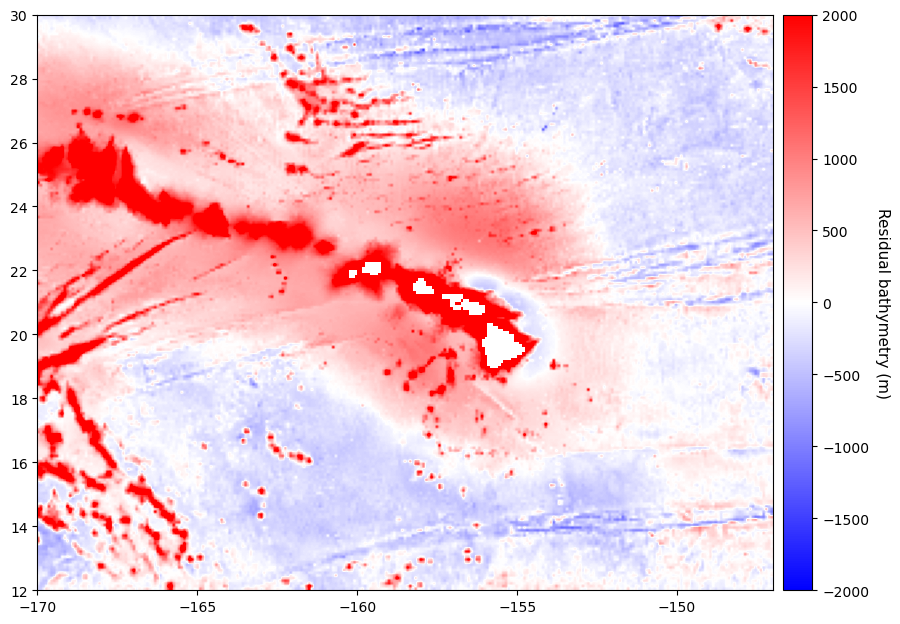

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
add_residual_bathymetry_hawaii(fig, ax,
                                colormap="bwr",
                                map_range=[-2000, 2000])

In [8]:
(distance * 1e-3 * 1)

1095.7625639526673

In [4]:
bathy_path = r"C:\Users\nbt571\Documents\GPlates\Datasets\Residual_Bathymetry\global_residual_bath_v1.xyz"
bathy_df = pd.read_csv(bathy_path, sep="\t", header=None, names=["lon", "lat", "dat"])

In [5]:
# Reduce size
bathy_filtered_df = bathy_df[(bathy_df['lon'] >= -170) & (bathy_df['lon'] <= -147) & 
                             (bathy_df['lat'] >= 12) & (bathy_df['lat'] <= 30)]

unique_longitude = bathy_filtered_df['lon'].unique()
unique_latitude = bathy_filtered_df['lat'].unique()
nlon = len(unique_longitude)
nlat = len(unique_latitude)

In [6]:
# Create an empty 2D array to store the reshaped data
grid_data = np.zeros((nlat, nlon))

# Fill in the data values
for index, row in bathy_filtered_df.iterrows():
    lon_idx = np.where(unique_longitude == row['lon'])[0][0]
    lat_idx = np.where(unique_latitude == row['lat'])[0][0]
    grid_data[lat_idx, lon_idx] = row['dat']
    


In [8]:

with open("RESIDUAL_BATHYMETRY_HAWAII.txt", 'wb+') as datafile:
    np.savetxt(datafile, grid_data,fmt='%.2f')
                       

In [13]:
def f_heat(R, v, rho, Cp, dT):
    return np.pi * R**2 * v * rho * Cp * dT


R = 50e3     # m
v = 3e-8     # m/s
rho = 3300   # kg/m^3
Cp = 1000    # J/kg/C
dT = 100    # C

heat = f_heat(R, v, rho, Cp, dT)
f"Heat: {heat:.2e} J/s = {heat/1e12:.2e} TW"

'Heat: 7.78e+10 J/s = 7.78e-02 TW'

### BONUS: Global heat flow by plumes

Estimates from magmatic hotspots yield a cumulative lower bound on global plume flux of $2~TW$, if all buoyancy is assumed to be thermal in origin. In the text file `BUOYANCY_FLUX_HOGGARD2020.txt` you will find the buoyancy flux for many plumes, in units of Mg/s (1 Mg = 10^6 kg). The data is tacken from Hoggard et al., 2020 (https://doi.org/10.1016/j.epsl.2020.116317).

In [14]:
buoy_path = os.path.join(path_to_data, "BUOYANCY_FLUX_HOGGARD2020.txt")
buoy_df = pd.read_csv(buoy_path, delimiter='\t', index_col=0)
buoy_df.head(10)    # To print the first 10 rows of the dataframe (it is a very long dataframe)


,Sleep1990,K&A2014,Hoggard2020
Afar,1.2,2.14,3.29
Ascension,–,0.11,0.36
Azores,1.1,0.38,0.85
Baja,0.3,0.01,0.00
Balleny,–,0.04,2.22
Bermuda,1.1,0.11,0.34
Bouvet,0.4,0.06,0.37
Bowie,0.3,0.05,0.51
Cameroon,–,0.00,1.09
Canary,1.0,0.29,0.93


The dataframe contains rows for each plume, and three columns which contain the buoyancy flux of each plume as obtained from different authors. Of our interest is the most recent one, Hoggard et al., 2020. You can access all the values in the column by using the following command:

```python
buoy_df['Hoggard2020']
```
or each row with:
    
```python
buoy_df.loc['Hawaii']
```

The buoyancy flux for the Iceland plume according to Hoggard et al., 2020 is $4.07~Mg/s$. This values can be accessed as illustrated below:

In [15]:
iceland_buoy = buoy_df["Hoggard2020"]["Iceland"]
f"Iceland bouyancy flux: {iceland_buoy} Mg s-1"

'Iceland bouyancy flux: 4.07 Mg s-1'

Can you come up with a way of estimating the heat flow for all the plumes listed under the `Hoggard2020` column of the `bouy_df` dataframe? Using the data from the file, can you come up with a way to calculate the total heat flow from all plumes and compare it to the estimated contribution of plumes in literature (~$2~TW$).

In [16]:
buoy_df.loc['Hawaii']

Sleep1990       8.7
K&A2014        4.90
Hoggard2020    2.78
Name: Hawaii, dtype: object